In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from scipy.optimize import curve_fit

In [54]:
data = pd.read_csv('/Users/lixinhai/Downloads/cluster_info.csv')
data2 = pd.read_csv('/Users/lixinhai/Downloads/cluster_info_size_and_Alpha.csv')

In [55]:
data2.head()

,Cluster_size,Cluster_count,cell_type,alpha,grid_size,growth_rate_C,fractal_dim,condi_entropy,autocorr
0,1.0,5.0,1.0,1.0,30,0.001,1.229716,11.588459,0.240164
1,412.0,1.0,1.0,1.0,30,0.001,1.229716,11.588459,0.240164
2,54.0,1.0,2.0,1.0,30,0.001,1.229716,11.588459,0.240164
3,3.0,1.0,3.0,1.0,30,0.001,1.229716,11.588459,0.240164
4,1.0,7.0,1.0,1.0,40,0.001,0.893139,12.346983,0.214241


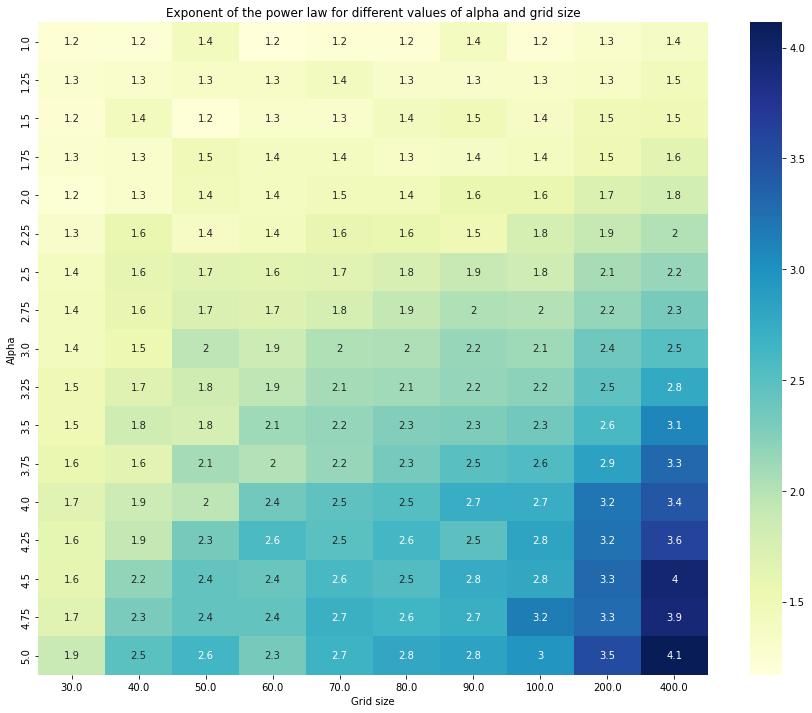

In [25]:
def linear_law(x, a, b):
    return a - b * x

# Initialize a list to store exponent results
exponents = []

# Get unique pairs of alpha and grid size
pairs = data2[['alpha', 'grid_size']].drop_duplicates().values

# For each pair of alpha and grid size, fit the power law to the data
for pair in pairs:
    alpha, grid_size = pair
    subset = data2[(data2['alpha'] == alpha) & (data2['grid_size'] == grid_size)]
    x = subset['Cluster_size'].values
    y = subset['Cluster_count'].values

    # Convert to logarithmic scale
    x_log = np.log(x)
    y_log = np.log(y)

    # Fit the linear law to the logarithmically transformed data
    popt, pcov = curve_fit(linear_law, x_log, y_log, maxfev=5000)
    a, b = popt

    # Add the exponent to the list
    exponents.append({
        'alpha': alpha,
        'grid_size': grid_size,
        'exponent': np.exp(b)
    })

# Convert the list of exponents to a DataFrame
exponents_df = pd.DataFrame(exponents)



# Plot the exponents
plt.figure(figsize=(15, 12))
sns.heatmap(exponents_df.pivot('alpha', 'grid_size', 'exponent'), annot=True, cmap='YlGnBu')
plt.title('Exponent of the power law for different values of alpha and grid size')
plt.xlabel('Grid size')
plt.ylabel('Alpha')

plt.show()



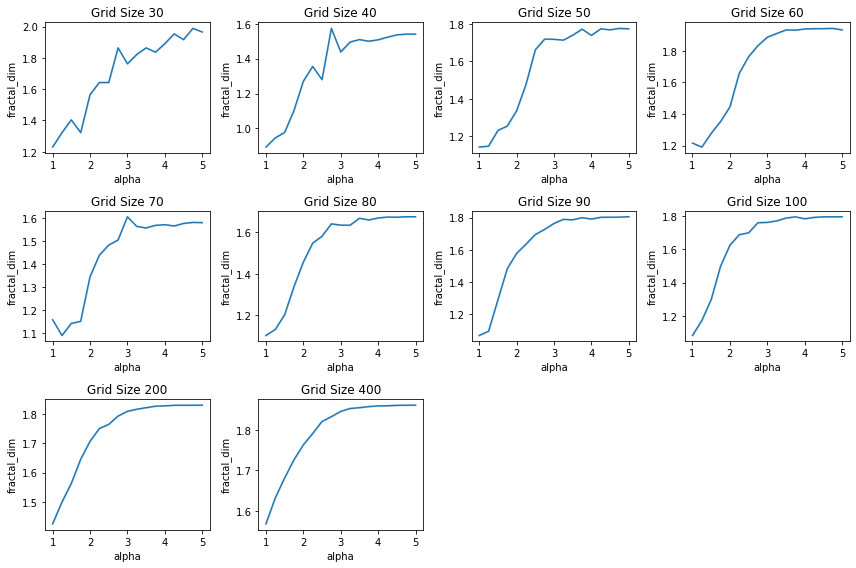

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Get unique grid sizes
unique_grid_sizes = data2['grid_size'].unique()

# Calculate the number of rows and columns for the subplot grid
num_plots = len(unique_grid_sizes)
num_rows = int(num_plots ** 0.5)
num_cols = (num_plots + num_rows - 1) // num_rows

# Create the GridSpec
gs = GridSpec(num_rows, num_cols)

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Iterate over the grid sizes and create subplots
for i, grid_size in enumerate(unique_grid_sizes):
    # Calculate the row and column indices for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Subset the data for the current grid size
    subset = data2[data2['grid_size'] == grid_size]
    
    # Create the subplot
    ax = fig.add_subplot(gs[row_idx, col_idx])
    sns.lineplot(data=subset, x='alpha', y='fractal_dim', ax=ax)
    ax.set_title(f'Grid Size {grid_size}')
    
# Adjust the spacing
fig.tight_layout()

# Show the combined plot
plt.show()


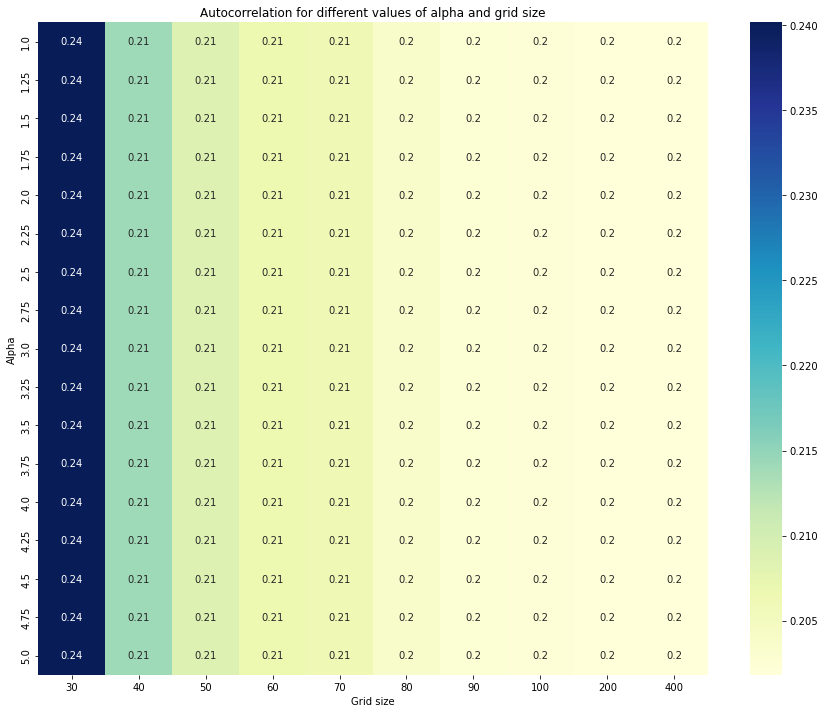

In [49]:

value = []

# for each grid size and alpha, plot the heatmap of autocorrelation
for grid_size in data2['grid_size'].unique():
    for alpha in data2['alpha'].unique():
        subset = data2[(data2['grid_size'] == grid_size) & (data2['alpha'] == alpha)]
        autocorr = subset['autocorr'].values

        value.append({
            'grid_size': grid_size,
            'alpha': alpha,
            'autocorr': np.max(autocorr)  # Use the mean value of the 'autocorr' array
        })

# Convert the list of exponents to a DataFrame
value_df = pd.DataFrame(value)

# Plot the exponents
plt.figure(figsize=(15, 12))
sns.heatmap(value_df.pivot('alpha', 'grid_size', 'autocorr'), annot=True, cmap='YlGnBu')
plt.title('Autocorrelation for different values of alpha and grid size')
plt.xlabel('Grid size')
plt.ylabel('Alpha')

plt.show()


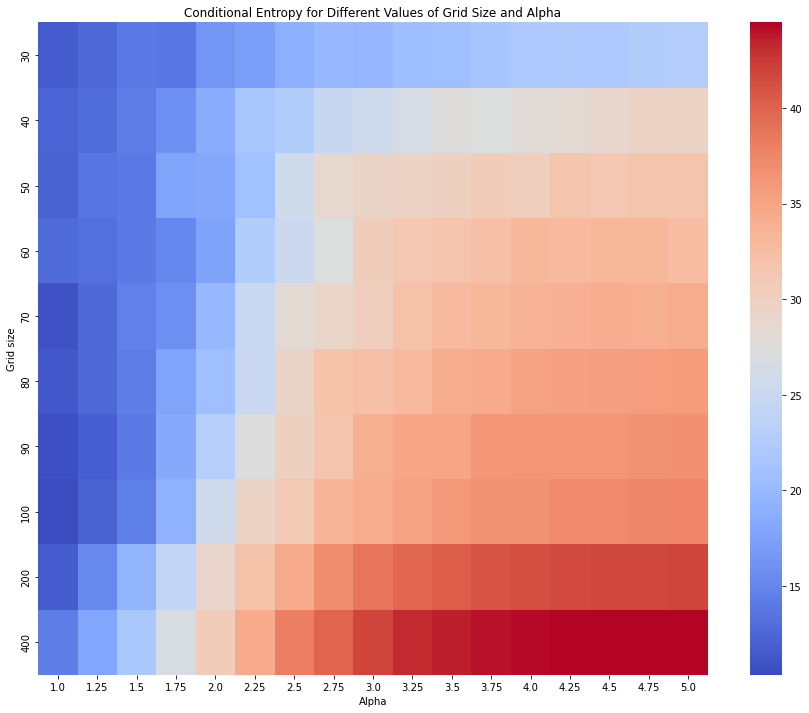

In [66]:
value = []

# for each grid size and alpha, plot the heatmap of autocorrelation
for grid_size in data2['grid_size'].unique():
    for alpha in data2['alpha'].unique():
        subset = data2[(data2['grid_size'] == grid_size) & (data2['alpha'] == alpha)]
        condi_entropy = subset['condi_entropy'].values

        value.append({
            'grid_size': grid_size,
            'alpha': alpha,
            'condi_entropy': np.mean(condi_entropy)  # Use the mean value of the 'condi_entropy' array
        })

# Convert the list of values to a DataFrame
value_df = pd.DataFrame(value)

# Plot the values
plt.figure(figsize=(15, 12))
sns.heatmap(value_df.pivot('grid_size', 'alpha', 'condi_entropy'), annot=False, cmap='coolwarm')
plt.title('Conditional Entropy for Different Values of Grid Size and Alpha')
plt.xlabel('Alpha')
plt.ylabel('Grid size')

plt.show()


In [ ]:
print(data.describe())

data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


print(data2.describe())

# Histograms for numeric columns
data2.hist(bins=30, figsize=(20,15))
plt.show()



In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


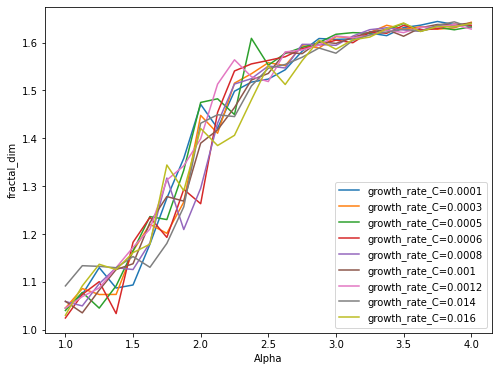

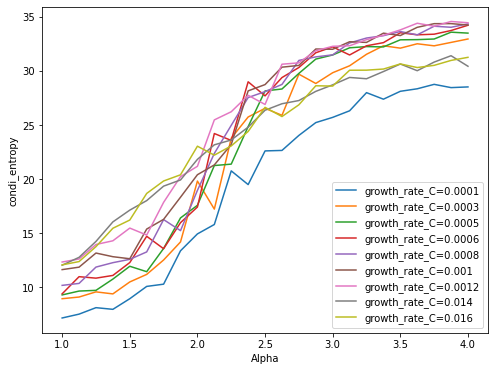

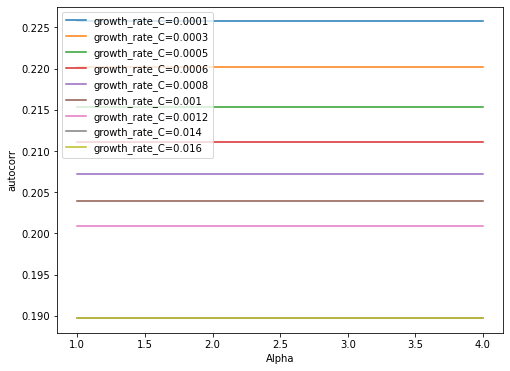

In [9]:
# Plot each output as a function of alpha and growth_rate_C
for output in ['fractal_dim', 'condi_entropy', 'autocorr']:
    plt.figure(figsize=(8, 6))
    for rate in data['growth_rate_C'].unique():
        subset = data[data['growth_rate_C'] == rate]
        plt.plot(subset['alpha'], subset[output], label=f'growth_rate_C={rate}')
    plt.xlabel('Alpha')
    plt.ylabel(output)
    plt.legend()
    plt.show()


